In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
def calculate_outliers_percentage(df, columns):
    outliers = {}
    for col in columns:
        z = np.abs(stats.zscore(df[col]))
        outlier_count = (z > 3).sum()
        outliers[col] = (outlier_count / len(df[col])) * 100
    return pd.DataFrame(outliers, index=['Outlier Percentage %']).round(3)

In [9]:
import scipy.stats as stats # For Checking Outliers


In [10]:
columns = ['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']
calculate_outliers_percentage(df, columns)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Outlier Percentage %,0.0,0.0,0.0,0.0


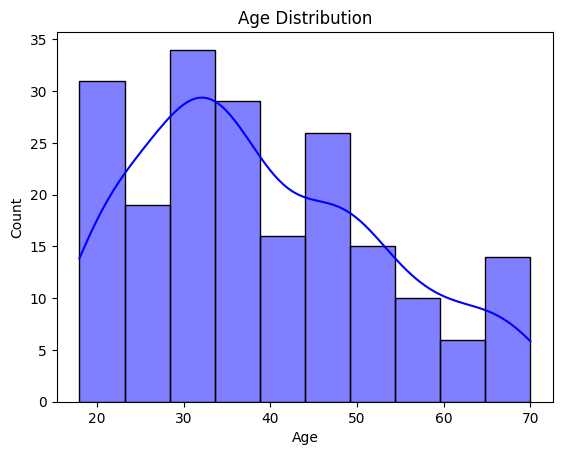

In [12]:
sns.histplot(df['Age'], bins=10, kde=True, color='b')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

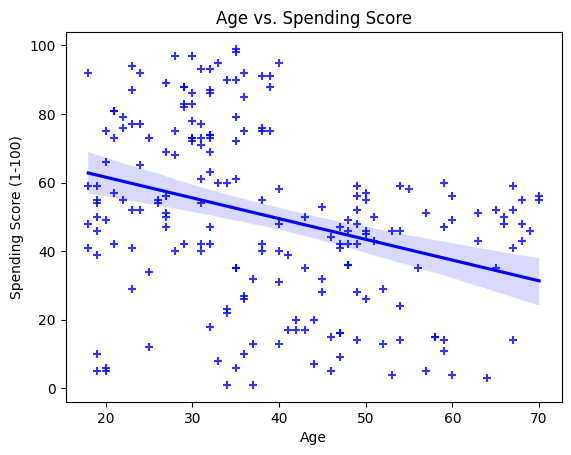

In [13]:
sns.regplot(x='Age', y='Spending Score (1-100)', data=df, color='b', marker='+')


plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs. Spending Score')
plt.show()


In [14]:
df.iloc[:, [2,4]]


,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [16]:
from sklearn.cluster import KMeans


In [15]:
X = df.iloc[: , [2,4]].values


In [18]:
#Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init=10)
    kmeans.fit(X)
    print('Cost_Function=',kmeans.inertia_,'with', i, 'Clusters')
    wcss.append(kmeans.inertia_)

Cost_Function= 171535.50000000003 with 1 Clusters
Cost_Function= 75949.15601023019 with 2 Clusters
Cost_Function= 45840.67661610866 with 3 Clusters
Cost_Function= 28165.583566629342 with 4 Clusters
Cost_Function= 23830.9603937729 with 5 Clusters
Cost_Function= 19489.643884468667 with 6 Clusters
Cost_Function= 15523.684014328752 with 7 Clusters
Cost_Function= 12997.449288119285 with 8 Clusters
Cost_Function= 11448.046985329489 with 9 Clusters
Cost_Function= 10165.683591704306 with 10 Clusters


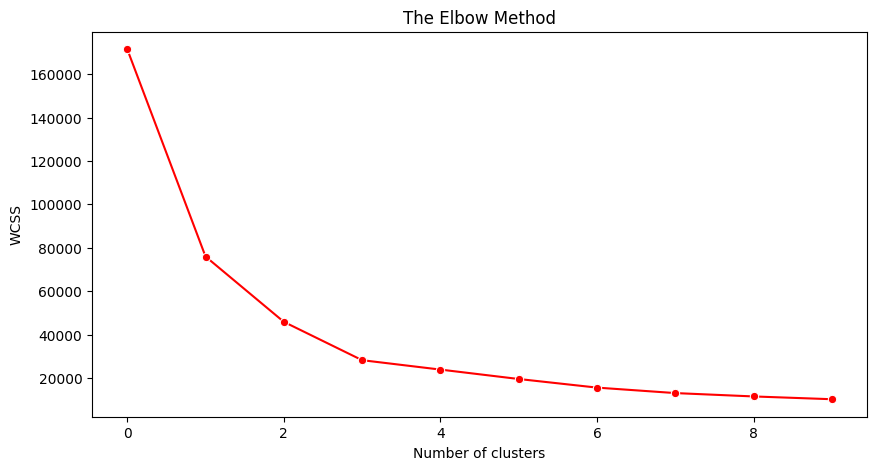

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#From the previous Gragh the optimal # of Clusters is 4


In [22]:
# Apply K-Mean Model
kmeans = KMeans(n_clusters = 4 , init = 'k-means++' , random_state=42,n_init=10)
y_kmeans = kmeans.fit_predict(X)


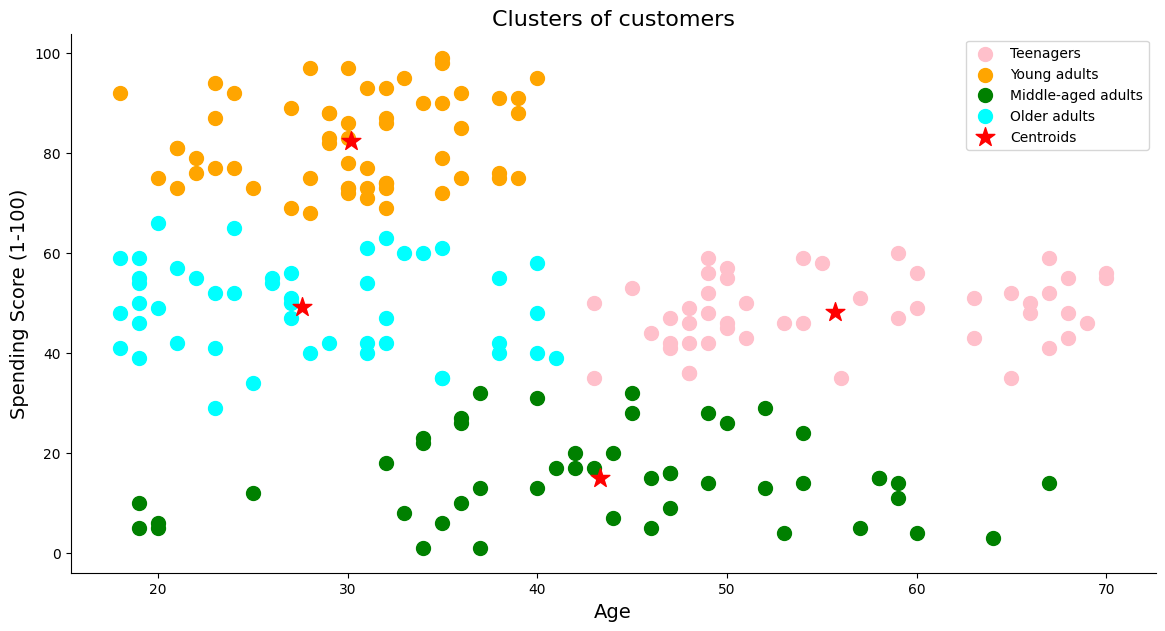

In [23]:
fig, ax = plt.subplots(figsize=(14,7))

ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='Pink', label='Teenagers')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='orange', label='Young adults')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Middle-aged adults')
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Older adults')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids')

ax.set_title('Clusters of customers', fontsize=16)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Spending Score (1-100)', fontsize=14)

ax.legend()

sns.despine() # Remove the top and right spines

plt.show()
